In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titanic_df = pd.read_csv('titanictrain.csv')


In [3]:
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

In [4]:
(titanic_df.head(5))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis=1, inplace=True)


In [6]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,Died,3,male,22.0,1,7.2500,NaN,NaN
1,Survived,1,female,38.0,1,71.2833,C85,C
2,Survived,3,female,26.0,0,7.9250,NaN,NaN
3,Survived,1,female,35.0,1,53.1000,C123,NaN
4,Died,3,male,35.0,0,8.0500,NaN,S


In [7]:
titanic_df = titanic_df.drop(['SibSp','Fare'], axis=1)


In [8]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,3,male,22.0,NaN,NaN
1,Survived,1,female,38.0,C85,C
2,Survived,3,female,26.0,NaN,NaN
3,Survived,1,female,35.0,C123,NaN
4,Died,3,male,35.0,NaN,S


In [9]:
titanic_df ['Pclass'] = titanic_df ['Pclass'].map({
    1: 'Luxury Class',
    2: 'Economy Class',
    3: 'Lower Class'
})
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")


In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,Lower Class,male,22.0,NaN,S
1,Survived,Luxury Class,female,38.0,C85,C
2,Survived,Lower Class,female,26.0,NaN,S
3,Survived,Luxury Class,female,35.0,C123,S
4,Died,Lower Class,male,35.0,NaN,S


In [11]:
titanic_df ['Embarked'] = titanic_df ['Embarked'].map({
    'C':'Chicago',
    'Q':'Queensland',
    'S':'Sydney'
})

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,Lower Class,male,22.0,NaN,Sydney
1,Survived,Luxury Class,female,38.0,C85,Chicago
2,Survived,Lower Class,female,26.0,NaN,Sydney
3,Survived,Luxury Class,female,35.0,C123,Sydney
4,Died,Lower Class,male,35.0,NaN,Sydney


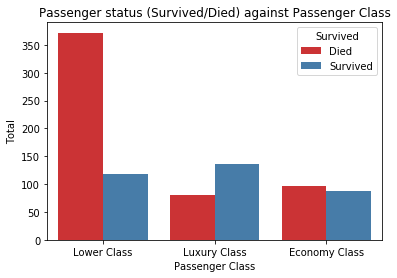

In [13]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


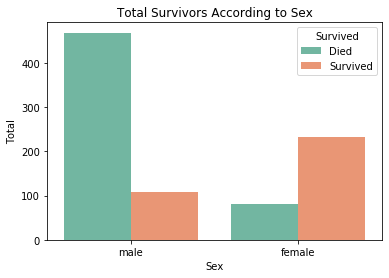

In [14]:
print(pd.crosstab(titanic_df["Sex"],titanic_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = titanic_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

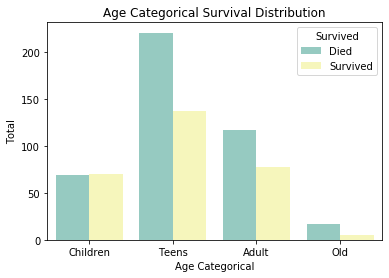

In [15]:
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
titanic_df['Age_cats'] = pd.cut(titanic_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = titanic_df, hue = 'Survived', palette = 'Set3')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")
plt.show()

Survived    Died  Survived
Embarked                  
Chicago       75        93
Queensland    47        30
Sydney       427       219


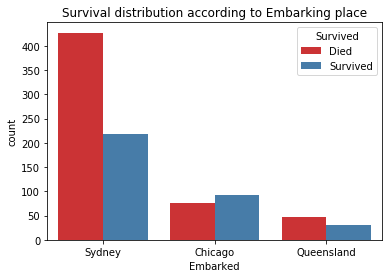

In [16]:
print(pd.crosstab(titanic_df['Embarked'], titanic_df.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = titanic_df)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()